##### experiment date 18-12-2024
# experiment result for standard reactor 
# W 15 mm, L 50mm, angle 24 degree, reactor volume 1.05 ml
# Test methylene orange concentration 0.1mM 
# with residence time 6 min (flow rate 1.05 ml/min)
# Test 2
# Reactor No.2


## Import library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data frame

In [5]:
# import the processed csv file
df = pd.read_csv('No2_t02_160125_nor.csv')
df

,time,abs
0,0.000000,-0.000843
1,0.002778,0.000269
2,0.005556,0.000546
3,0.008333,0.000075
4,0.011111,0.000888
...,...,...
1436,3.988889,0.001691
1437,3.991667,0.000734
1438,3.994444,0.002302
1439,3.997222,0.001938


In [7]:
df['ตัวแปรไร้หน่วย (θ)'] = df['time']

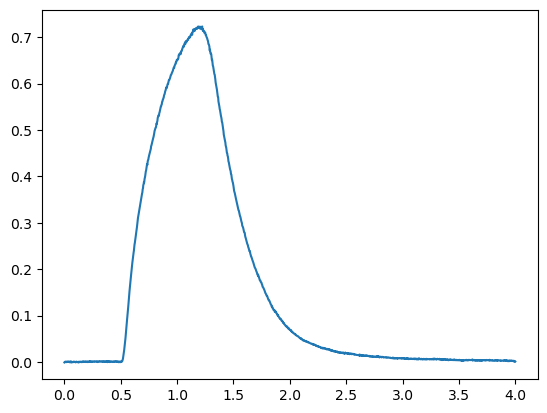

In [10]:
# assume concentration = absorbance
# due to absilon and l are constance 
# plot the raw data curve 
plt.plot(df['ตัวแปรไร้หน่วย (θ)'], df['abs'])
plt.show()

In [11]:
# find area under curve
# RTD = C(t) / (integral(C(t) dt))
total_conc = np.trapz(df['abs'], df['ตัวแปรไร้หน่วย (θ)'])
E_θ = df['abs'] / total_conc 
time_span = df['ตัวแปรไร้หน่วย (θ)']

In [14]:
# find E_θ
df['E_θ'] = df['abs'] / total_conc
df['E_θ']

0      -0.001330
1       0.000424
2       0.000861
3       0.000119
4       0.001401
          ...   
1436    0.002668
1437    0.001158
1438    0.003632
1439    0.003059
1440    0.002031
Name: E_θ, Length: 1441, dtype: float64

In [16]:
# Check total concentration
total_conc

0.6337182200173174

In [18]:
# Check total concentration
E_tn = np.trapz(E_θ)
E_tn

359.999999995212

In [20]:
# calculate mean residence time
mean_RTD = np.trapz(time_span * E_θ, time_span)
mean_RTD

1.2262556491012153

In [22]:
# calculate variance 
var_RTD = np.trapz((time_span - mean_RTD)**2 * E_θ, time_span)
var_RTD

0.18604689420639198

In [24]:
len(time_span)

1441

In [26]:
# not use
test_mean = np.trapz((time_span - mean_RTD)**2 *E_θ, time_span)
variance = test_mean/len(time_span)
variance

0.00012910957266231226

In [28]:
time_span

0       0.000000
1       0.002778
2       0.005556
3       0.008333
4       0.011111
          ...   
1436    3.988889
1437    3.991667
1438    3.994444
1439    3.997222
1440    4.000000
Name: ตัวแปรไร้หน่วย (θ), Length: 1441, dtype: float64

In [30]:

df

,time,abs,ตัวแปรไร้หน่วย (θ),E_θ
0,0.000000,-0.000843,0.000000,-0.001330
1,0.002778,0.000269,0.002778,0.000424
2,0.005556,0.000546,0.005556,0.000861
3,0.008333,0.000075,0.008333,0.000119
4,0.011111,0.000888,0.011111,0.001401
...,...,...,...,...
1436,3.988889,0.001691,3.988889,0.002668
1437,3.991667,0.000734,3.991667,0.001158
1438,3.994444,0.002302,3.994444,0.003632
1439,3.997222,0.001938,3.997222,0.003059


In [32]:
# ค้นหาค่าสูงสุดของกราฟ RTD
peak_index = np.argmax(E_θ)
peak_value = E_θ[peak_index]

# คำนวณค่าครึ่งหนึ่งของจุดสูงสุด
half_max = peak_value / 2

# หาตำแหน่งที่ RTD >= ครึ่งหนึ่งของจุดสูงสุด
indices = np.where(E_θ >= half_max)[0]

# คำนวณความกว้าง (FWHM)
fwhm = time_span[indices[-1]] - time_span[indices[0]]

In [34]:
#check fwhm
fwhm

0.822222222

In [36]:
t1 = np.where(E_θ >= half_max)[0]
t1

array([248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
       391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403,
       404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416,
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 42

In [38]:
t2 = np.where(E_θ >= half_max)
t2

(array([248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
        261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
        274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
        287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
        300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
        313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
        326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
        339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
        352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
        365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
        378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
        391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403,
        404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416,
        417, 418, 419, 420, 421, 422, 423, 424, 425

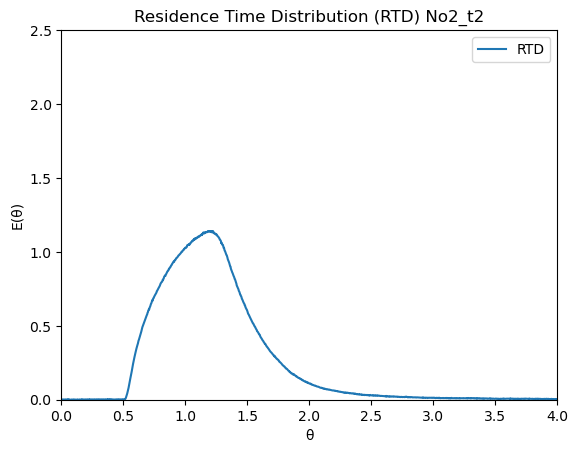

Mean RTD :  1.23 
Variance of RTD:  0.19 
ความกว้างของกราฟ (FWHM): 0.82 


In [40]:
# plot RTD with time span
plt.plot(df['time'], df['E_θ'], label='RTD')
plt.title('Residence Time Distribution (RTD) No2_t2')
plt.xlabel('θ')
plt.ylabel('E(θ)')
plt.xlim(0,4)
plt.ylim(-0.0001, 2.5)
plt.legend()
plt.savefig('E_No1_t02_nor.png')
plt.show()

# print mean RTD and vairace
print(f'Mean RTD : {mean_RTD: .2f} ')
print(f'Variance of RTD: {var_RTD: .2f} ')
print(f"ความกว้างของกราฟ (FWHM): {fwhm:.2f} ")

In [41]:
# save the data set to csv
df['E_θ'].to_csv('No1_t02_160125_Et.csv', index=False)